Fussy KMeans - A kind of soft KMeans

In [1]:
import mKMeans as mkm
import numpy as np
import matplotlib.pyplot as plt

load data, and def function.

In [2]:
HCM_data = np.array([[-3, 2],
                     [-3, -2],
                     [-3, 0],
                     [-2, 1],
                     [-2, 0],
                     [-2, -2],
                     [-1, 0],
                     [0, 0],
                     [1, 0],
                     [2, 1],
                     [2, 0],
                     [2, -1],
                     [3, 2],
                     [3, 0],
                     [3, -2]])

def draw(labels, centroids, title, data_2d):
    plt.figure()
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.title(title)
    plt.legend()
    plt.show()
    
def draw_soft_function(centroids, title, data_2d, probabilities):
    plt.figure()
    
    plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', edgecolors='black', s=100, marker='X', label='Centroids')

    plt.title('Soft KMeans Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    for i in range(probabilities.shape[1]):
        # 提取属于当前聚类的隶属度
        membership_probabilities = probabilities[:, i]
        # 为了可视化效果，我们可以取每个点对应聚类的隶属度作为颜色的透明度
        plt.scatter(data_2d[:, 0], data_2d[:, 1],
                    c=membership_probabilities, cmap='viridis', alpha=0.5)
    
    plt.colorbar(label='Membership Probability')
    # plt.legend()
    plt.show()


init and fit.

[[0.19579281 0.80420719]
 [0.17568503 0.82431497]
 [0.07680502 0.92319498]
 [0.08576103 0.91423897]
 [0.0088826  0.9911174 ]
 [0.17969732 0.82030268]
 [0.06384681 0.93615319]
 [0.52009164 0.47990836]
 [0.95035471 0.04964529]
 [0.92367976 0.07632024]
 [0.98883911 0.01116089]
 [0.92924463 0.07075537]
 [0.8126135  0.1873865 ]
 [0.9188309  0.0811691 ]
 [0.81426542 0.18573458]]


D:\Sustech\2024Spring\SDM359_Advanced_Machine_Learning\SDM359_Advanced_Machine_Learning\assignment\ass11\mKMeans.py:200: RuntimeWarning: divide by zero encountered in divide
  denominator = np.sum((numerator / distances) ** (2 / (self.beta - 1)))


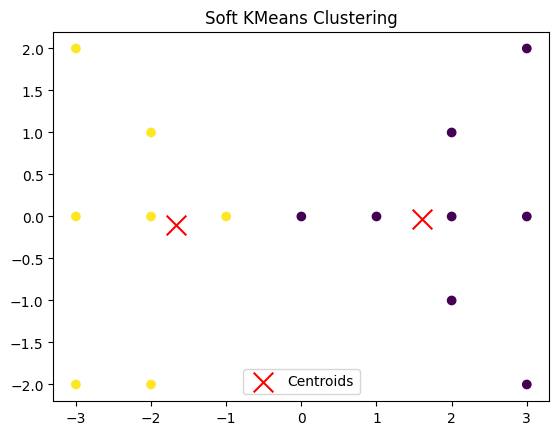

In [3]:
features = HCM_data
soft_kmeans = mkm.SoftKMeans(k=2,beta=2.0)  # beta参数控制soft assignment的程度
soft_kmeans.fit(features)

# 获取隶属度矩阵
probabilities = soft_kmeans.calculate_responsibilities(features)
# print(probabilities)
# draw the hard kmeans result.
draw(soft_kmeans.labels_, soft_kmeans.centroids, 'Soft KMeans Clustering', features)

visualize soft kmeans.

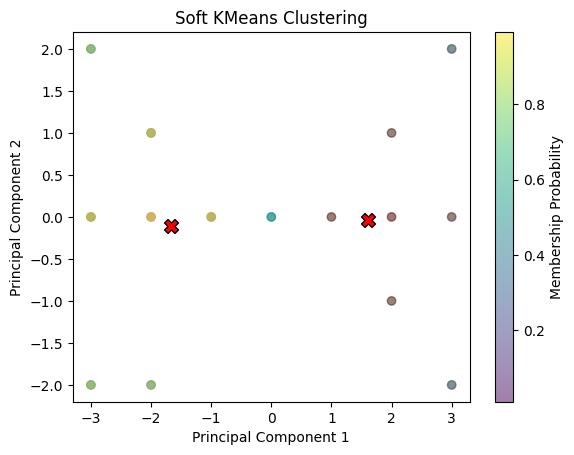

centers:  [[ 1.61080576 -0.03169484]
 [-1.67404579 -0.10301148]]


In [4]:
# 绘制渐变色的散点图
draw_soft_function(soft_kmeans.centroids, 'Soft KMeans Clustering', features, probabilities)
print('centers: ', soft_kmeans.centroids)

# For 8.2

In [0]:
center_82 = np.array([
    [-2,0],
    [2,0]
])
data_82 = np.array([
    [-2,1],
    [-2,-1],
    [0,0],
    [0,10],
    [2,1],
    [2,-1]
])
kmeans_82 = mkm.SoftKMeansForAss(k=2,beta=2.0, epochs=1)  # beta参数控制soft assignment的程度

Use fuzzy kmeans:

centroids are: [[-1.18518519  1.66666667]
 [ 1.18518519  1.66666667]]


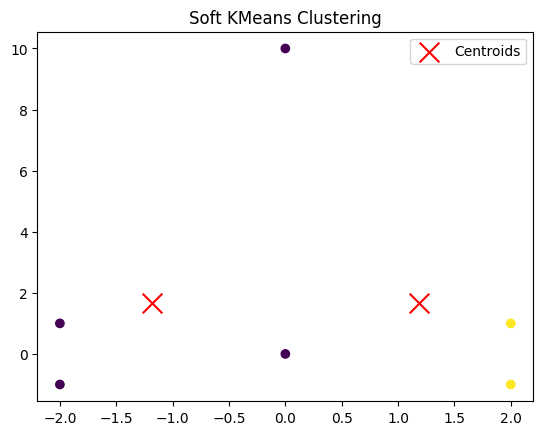

In [9]:
kmeans_82.fit_fuzzy(data_82, init_centroids=center_82)
draw(kmeans_82.labels_, kmeans_82.centroids, 'Soft KMeans Clustering', data_82)

Use possibility kmeans:

centroids are: [[-1.34615385  0.07211538]
 [ 1.34615385  0.07211538]]


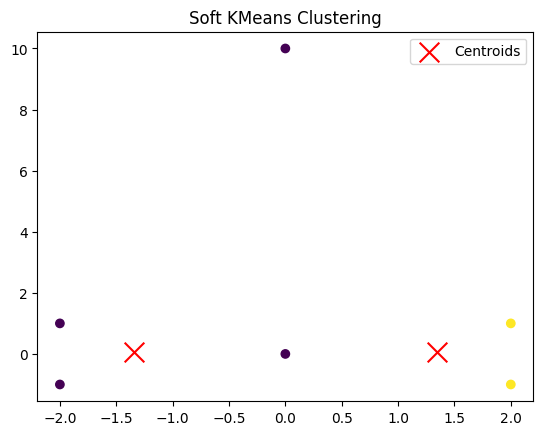

In [10]:
kmeans_82.fit_possibilities(data_82, init_centroids=center_82)
draw(kmeans_82.labels_, kmeans_82.centroids, 'Soft KMeans Clustering', data_82)


# For 8.3
## a.

centroids are: [[0.69328082 0.53962391]
 [3.50890109 3.54100266]]
centroids are: [[0.79386818 0.73555702]
 [3.40742791 3.4107183 ]]
centroids are: [[0.87053631 0.8499721 ]
 [3.28449045 3.2847468 ]]
centroids are: [[0.93720531 0.93059063]
 [3.1647128  3.16472773]]
centroids are: [[0.99852228 0.99658053]
 [3.06276117 3.06276184]]
centroids are: [[1.05764128 1.05712123]
 [2.9834462  2.98344622]]
centroids are: [[1.11752702 1.11740048]
 [2.9235821  2.9235821 ]]
centroids are: [[1.18117876 1.18115103]
 [2.87797684 2.87797684]]
centroids are: [[1.25177018 1.25176479]
 [2.84238537 2.84238537]]
centroids are: [[1.33268561 1.3326847 ]
 [2.81387037 2.81387037]]


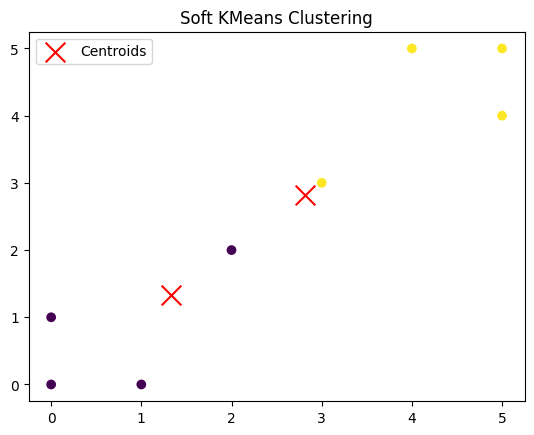

In [6]:
centers_83 = np.array([
    [0.5,0],
    [3.5,3.75]
])
kmeans_83a = mkm.SoftKMeansForAss(k=2,beta=2.0, epochs=10)  # beta参数控制soft assignment的程度
data_83 = np.array([
    [0,0],
    [0,1],
    [5,4],
    [5,5],
    [4,5],
    [1,0],
    [2,2],
    [3,3]
])
kmeans_88_2=kmeans_83a.fit_possibilities(data_83, init_centroids = centers_83)
draw(kmeans_83a.labels_, kmeans_83a.centroids, 'Soft KMeans Clustering', data_83)

## b

centroids are: [[0.69328082 0.53962391]
 [3.50890109 3.54100266]]
centroids are: [[0.79386818 0.73555702]
 [3.40742791 3.4107183 ]]
centroids are: [[0.87053631 0.8499721 ]
 [3.28449045 3.2847468 ]]
centroids are: [[0.93720531 0.93059063]
 [3.1647128  3.16472773]]
centroids are: [[0.99852228 0.99658053]
 [3.06276117 3.06276184]]
centroids are: [[1.05764128 1.05712123]
 [2.9834462  2.98344622]]
centroids are: [[1.11752702 1.11740048]
 [2.9235821  2.9235821 ]]
centroids are: [[1.18117876 1.18115103]
 [2.87797684 2.87797684]]
centroids are: [[1.25177018 1.25176479]
 [2.84238537 2.84238537]]
centroids are: [[1.33268561 1.3326847 ]
 [2.81387037 2.81387037]]


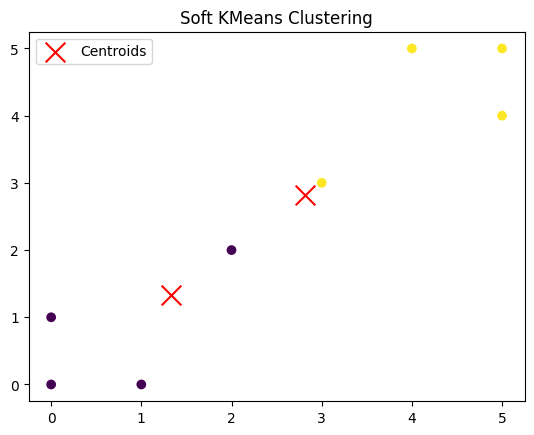

In [7]:
kmeans_83b = mkm.SoftKMeansForAss(k=3,beta=2.0, epochs=10)
centers_83b = np.concatenate((kmeans_83a.centroids.copy(), np.array([[5, 5]])), axis=0)
kmeans_88_3 = kmeans_83b.fit_possibilities(data_83, init_centroids = centers_83)
draw(kmeans_83b.labels_, kmeans_83b.centroids, 'Soft KMeans Clustering', data_83)


# 8.8
## a.

In [8]:
y1 = np.array([[2.5,2]])
y2 = np.array([[0.5,0.5]])

#2NN:
print("responsibilities for 2NN is: ", kmeans_88_2.calculate_responsibilities(y1))
print("responsibilities for 2NN is: ", kmeans_88_2.calculate_responsibilities(y2))

#3NN:
print("responsibilities for 3NN is: ", kmeans_88_3.calculate_responsibilities(y1))
print("responsibilities for 3NN is: ", kmeans_88_3.calculate_responsibilities(y2))

responsibilities for 2NN is:  [[0.35613391 0.56789155]]
responsibilities for 2NN is:  [[0.41898344 0.08541174]]
responsibilities for 3NN is:  [[0.35613391 0.56789155]]
responsibilities for 3NN is:  [[0.41898344 0.08541174]]


## b.